<a href="https://colab.research.google.com/github/trisharangi/titanic-survival-logistic-regression-lmh2-25/blob/main/Titanic_Survival_Model_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Task: Train a Logistic Regression Classifier to Predict Passenger Survival on the Titanic Dataset

You are provided with code to download and load the Titanic dataset in CSV format.

In the dataset, each row contains information about a Titanic passenger — such as their name, gender, class, etc. (See the dataframe preview below for more details.)

The target column is **'Survived'**, which indicates whether a passenger survived or not.

You may use any of the other columns as input features (feel free to drop any columns you believe are not useful).

Your task is to train a logistic regression model that takes these input features (make sure not to accidentally include the 'Survived' column as an input) and predicts whether a passenger with those features would survive.

Use an 80:20 split for training and testing.

Be sure to focus on code quality and include a method to evaluate how well your model performs on **testing data**.

**Bonus:** Try to identify which feature(s) most strongly influence a passenger’s likelihood of survival.


In [ ]:
from IPython.display import clear_output
import math # Mathematical functions and constants
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns  # For better visualizations
from sklearn.datasets import load_breast_cancer # Load real-life dataset
from sklearn.model_selection import train_test_split  # Splitting dataset
from sklearn.linear_model import LogisticRegression  # Sklearn implementation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from sklearn.preprocessing import StandardScaler # Normalize data

In [ ]:
%pip install numpy
%pip install pandas
%pip install matplotlib
%pip install gdown

clear_output()

In [ ]:
# Install the opendatasets library
%pip install opendatasets -qq

clear_output()


## NOTE: You'll be asked to insert your 'Kaggle-username' and 'key'.
 To get your `Kaggle username` and `key`:
 1. Go to **Kaggle.com**,
 2. log in (or create a new account if you haven't),
 3. click on your **profile picture**, then "**Account**".
 4. Scroll down to the "**API**" section and click "**Create New API Token**".
 5. This will download a **kaggle.json** file containing your `username` and `key`.
 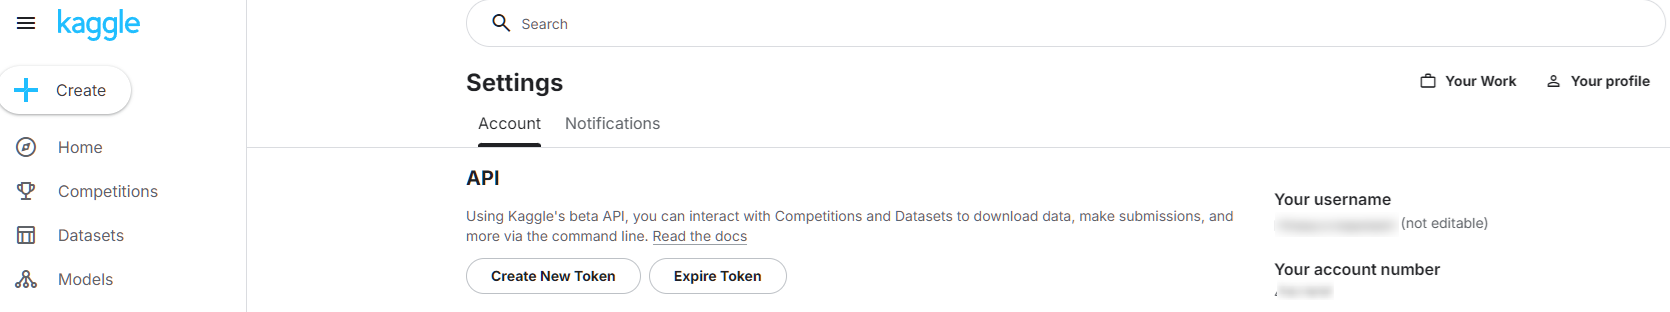



In [ ]:
import opendatasets as od

# Download the dataset
od.download("https://www.kaggle.com/datasets/yasserh/titanic-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: trisharangi
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/yasserh/titanic-dataset


100%|██████████| 22.0k/22.0k [00:00<00:00, 12.1MB/s]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
titanic_data = pd.read_csv('titanic-dataset/Titanic-Dataset.csv')

In [ ]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_y = titanic_data['Survived']
data_x = titanic_data.drop(columns=['Survived'])

In [ ]:
data_x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data_y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
class Passengers:
  def __init__(self, data):
    self.data = data
    self.survival = data['Survived']
    self.pclass = data['Pclass']
    self.gender = data['Sex']
    self.age = data['Age']
    self.sib = data['SibSp']
    self.par_ch = data['Parch']
    self.price = data['Fare']
    self.port = data['Embarked']

#Creating LogisticRegression from Scratch to aid with Plotting
class LogisticRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.W = None
        self.b = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0
        self.loss_history = []

        threshold = 1e-5

        for epoch in range(self.epochs):
            linear_model = np.dot(X, self.W) + self.b
            y_predicted = self.sigmoid(linear_model)

            epsilon = 1e-10
            y_predicted = np.clip(y_predicted, epsilon, 1 - epsilon)

            loss = -np.mean(y * np.log(y_predicted) + (1 - y) * np.log(1 - y_predicted))
            self.loss_history.append(loss)

            dW = np.dot(X.T, (y_predicted - y)) / n_samples
            db = np.sum(y_predicted - y) / n_samples

            old_W = self.W.copy()
            old_b = self.b

            self.W -= self.learning_rate * dW
            self.b -= self.learning_rate * db

            if np.abs(old_W - self.W).max() < threshold and np.abs(old_b - self.b) < threshold:
                print(f"Converged after {epoch} epochs")
                break

            if epoch % 1000 == 0:
                print(f"Epoch {epoch}: Loss = {loss:.4f}")

    def predict(self, X):
        linear_model = np.dot(X, self.W) + self.b
        y_predicted = self.sigmoid(linear_model)
        return np.array([1 if i > 0.5 else 0 for i in y_predicted])


In [ ]:
from sklearn.impute import SimpleImputer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Clean and split the Titanic dataset into features and target, and categorize columns by type
# People without cabins are the 3rd class passengers
format_titanic_data = titanic_data.drop(columns=['Name', 'Ticket', 'Cabin','PassengerId'])
titanic = Passengers(format_titanic_data)
total_passengers = len(titanic.data)

x = titanic.data.drop(columns=['Survived'])
y = titanic.data['Survived']

categorical_cols = ['Sex', 'Embarked']
numerical_cols = [col for col in x.columns if col not in categorical_cols]

# Build preprocessing pipeline for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='median')  # fill missing ages/fare with median
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # fill missing embarked with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Create the logistic regression pipeline
clf = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Split data (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=96)

# Train model
clf.fit(x_train, y_train)

# Predict on test set
y_pred = clf.predict(x_test)

# Evaluate performance
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Bonus: Feature importance by coefficients
# Get feature names after one-hot encoding
onehot_columns = clf.named_steps['preprocessor'].named_transformers_['cat'] \
    .named_steps['onehot'].get_feature_names_out(categorical_cols)
all_features = numerical_cols + list(onehot_columns)

coefficients = clf.named_steps['classifier'].coef_[0]

feature_importance = pd.DataFrame({
    'Feature': all_features,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("\nFeature importance (sorted by absolute coefficient value):")
print(feature_importance)



Accuracy: 0.804
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       123
           1       0.68      0.71      0.70        56

    accuracy                           0.80       179
   macro avg       0.77      0.78      0.78       179
weighted avg       0.81      0.80      0.81       179


Feature importance (sorted by absolute coefficient value):
      Feature  Coefficient
6    Sex_male    -1.329910
5  Sex_female     1.325799
0      Pclass    -1.126043
2       SibSp    -0.332481
9  Embarked_S    -0.269259
8  Embarked_Q     0.211939
7  Embarked_C     0.053209
3       Parch     0.043206
1         Age    -0.033860
4        Fare     0.001364


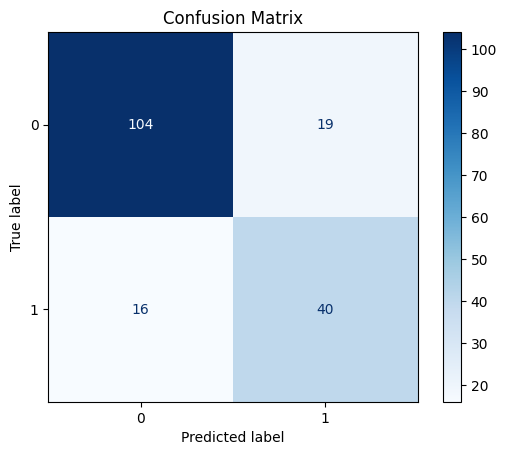

Confusion Matrix:
[[104  19]
 [ 16  40]]
Precision: 0.6779661016949152
Recall: 0.7142857142857143
F1 Score: 0.6956521739130435
Passenger 0:
Pclass           1
Sex         female
Age             30
SibSp            0
Parch            0
Fare           100
Embarked         S
Name: 0, dtype: object
Predicted Survival: Yes (Probabilities: [0.06125412 0.93874588])

Passenger 1:
Pclass         3
Sex         male
Age           22
SibSp          1
Parch          0
Fare           7
Embarked       Q
Name: 1, dtype: object
Predicted Survival: No (Probabilities: [0.86824197 0.13175803])



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score, f1_score

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print("Confusion Matrix:")
print(cm)

# Additional metrics
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

# Sample predictions
sample_passengers = pd.DataFrame({
    'Pclass': [1, 3],
    'Sex': ['female', 'male'],
    'Age': [30, 22],
    'SibSp': [0, 1],
    'Parch': [0, 0],
    'Fare': [100, 7],
    'Embarked': ['S', 'Q']
})

predictions = clf.predict(sample_passengers)
pred_probs = clf.predict_proba(sample_passengers)

for i, passenger in sample_passengers.iterrows():
    print(f"Passenger {i}:")
    print(passenger)
    print(f"Predicted Survival: {'Yes' if predictions[i] == 1 else 'No'} (Probabilities: {pred_probs[i]})\n")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 1/100 - Train Loss: 0.6632 - Train Acc: 0.6728 - Test Acc: 0.7318
Epoch 2/100 - Train Loss: 0.6386 - Train Acc: 0.6587 - Test Acc: 0.7263
Epoch 3/100 - Train Loss: 0.6356 - Train Acc: 0.6587 - Test Acc: 0.7263


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 4/100 - Train Loss: 0.6346 - Train Acc: 0.6587 - Test Acc: 0.7207
Epoch 5/100 - Train Loss: 0.6337 - Train Acc: 0.6587 - Test Acc: 0.7207


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 6/100 - Train Loss: 0.6278 - Train Acc: 0.6784 - Test Acc: 0.7151
Epoch 7/100 - Train Loss: 0.6175 - Train Acc: 0.6980 - Test Acc: 0.7095


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 8/100 - Train Loss: 0.5950 - Train Acc: 0.6868 - Test Acc: 0.7151
Epoch 9/100 - Train Loss: 0.5690 - Train Acc: 0.7135 - Test Acc: 0.7207


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 10/100 - Train Loss: 0.5550 - Train Acc: 0.7065 - Test Acc: 0.7318
Epoch 11/100 - Train Loss: 0.5515 - Train Acc: 0.7051 - Test Acc: 0.7095
Epoch 12/100 - Train Loss: 0.5503 - Train Acc: 0.7093 - Test Acc: 0.7263


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 13/100 - Train Loss: 0.5485 - Train Acc: 0.7022 - Test Acc: 0.7430
Epoch 14/100 - Train Loss: 0.5446 - Train Acc: 0.7065 - Test Acc: 0.7430
Epoch 15/100 - Train Loss: 0.5403 - Train Acc: 0.7121 - Test Acc: 0.7374
Epoch 16/100 - Train Loss: 0.5290 - Train Acc: 0.7275 - Test Acc: 0.7430
Epoch 17/100 - Train Loss: 0.5079 - Train Acc: 0.7697 - Test Acc: 0.7598


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 18/100 - Train Loss: 0.4859 - Train Acc: 0.7978 - Test Acc: 0.7989
Epoch 19/100 - Train Loss: 0.4743 - Train Acc: 0.7893 - Test Acc: 0.7989
Epoch 20/100 - Train Loss: 0.4726 - Train Acc: 0.7879 - Test Acc: 0.7989
Epoch 21/100 - Train Loss: 0.4725 - Train Acc: 0.7865 - Test Acc: 0.7989
Epoch 22/100 - Train Loss: 0.4725 - Train Acc: 0.7865 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 23/100 - Train Loss: 0.4725 - Train Acc: 0.7865 - Test Acc: 0.7989
Epoch 24/100 - Train Loss: 0.4725 - Train Acc: 0.7865 - Test Acc: 0.7989
Epoch 25/100 - Train Loss: 0.4723 - Train Acc: 0.7795 - Test Acc: 0.7989
Epoch 26/100 - Train Loss: 0.4723 - Train Acc: 0.7823 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 27/100 - Train Loss: 0.4718 - Train Acc: 0.7795 - Test Acc: 0.7989
Epoch 28/100 - Train Loss: 0.4713 - Train Acc: 0.7823 - Test Acc: 0.7989
Epoch 29/100 - Train Loss: 0.4698 - Train Acc: 0.7809 - Test Acc: 0.7989
Epoch 30/100 - Train Loss: 0.4652 - Train Acc: 0.7893 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 31/100 - Train Loss: 0.4636 - Train Acc: 0.7921 - Test Acc: 0.7989
Epoch 32/100 - Train Loss: 0.4636 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 33/100 - Train Loss: 0.4633 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 34/100 - Train Loss: 0.4632 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 35/100 - Train Loss: 0.4629 - Train Acc: 0.7935 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 36/100 - Train Loss: 0.4626 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 37/100 - Train Loss: 0.4614 - Train Acc: 0.7935 - Test Acc: 0.8045
Epoch 38/100 - Train Loss: 0.4592 - Train Acc: 0.7992 - Test Acc: 0.8045
Epoch 39/100 - Train Loss: 0.4558 - Train Acc: 0.7978 - Test Acc: 0.8101


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 40/100 - Train Loss: 0.4544 - Train Acc: 0.7992 - Test Acc: 0.8156
Epoch 41/100 - Train Loss: 0.4522 - Train Acc: 0.7949 - Test Acc: 0.8156
Epoch 42/100 - Train Loss: 0.4517 - Train Acc: 0.7865 - Test Acc: 0.8156
Epoch 43/100 - Train Loss: 0.4516 - Train Acc: 0.7865 - Test Acc: 0.8156


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 44/100 - Train Loss: 0.4516 - Train Acc: 0.7865 - Test Acc: 0.8156
Epoch 45/100 - Train Loss: 0.4514 - Train Acc: 0.7879 - Test Acc: 0.8156
Epoch 46/100 - Train Loss: 0.4510 - Train Acc: 0.7963 - Test Acc: 0.8156
Epoch 47/100 - Train Loss: 0.4505 - Train Acc: 0.7963 - Test Acc: 0.8156


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 48/100 - Train Loss: 0.4495 - Train Acc: 0.7949 - Test Acc: 0.8212
Epoch 49/100 - Train Loss: 0.4480 - Train Acc: 0.7935 - Test Acc: 0.8268
Epoch 50/100 - Train Loss: 0.4467 - Train Acc: 0.7949 - Test Acc: 0.8101
Epoch 51/100 - Train Loss: 0.4464 - Train Acc: 0.7935 - Test Acc: 0.8101


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 52/100 - Train Loss: 0.4459 - Train Acc: 0.7935 - Test Acc: 0.8045
Epoch 53/100 - Train Loss: 0.4459 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 54/100 - Train Loss: 0.4458 - Train Acc: 0.7907 - Test Acc: 0.7989
Epoch 55/100 - Train Loss: 0.4458 - Train Acc: 0.7893 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 56/100 - Train Loss: 0.4455 - Train Acc: 0.7893 - Test Acc: 0.7989
Epoch 57/100 - Train Loss: 0.4452 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 58/100 - Train Loss: 0.4449 - Train Acc: 0.7978 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 59/100 - Train Loss: 0.4447 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 60/100 - Train Loss: 0.4447 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 61/100 - Train Loss: 0.4447 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 62/100 - Train Loss: 0.4446 - Train Acc: 0.7935 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 63/100 - Train Loss: 0.4446 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 64/100 - Train Loss: 0.4446 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 65/100 - Train Loss: 0.4446 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 66/100 - Train Loss: 0.4446 - Train Acc: 0.7935 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 67/100 - Train Loss: 0.4445 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 68/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 69/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 70/100 - Train Loss: 0.4445 - Train Acc: 0.7963 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 71/100 - Train Loss: 0.4445 - Train Acc: 0.7963 - Test Acc: 0.8045
Epoch 72/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 73/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 74/100 - Train Loss: 0.4445 - Train Acc: 0.7963 - Test Acc: 0.8045


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 75/100 - Train Loss: 0.4446 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 76/100 - Train Loss: 0.4446 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 77/100 - Train Loss: 0.4446 - Train Acc: 0.7963 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 78/100 - Train Loss: 0.4446 - Train Acc: 0.7963 - Test Acc: 0.7989
Epoch 79/100 - Train Loss: 0.4446 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 80/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 81/100 - Train Loss: 0.4445 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 82/100 - Train Loss: 0.4444 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 83/100 - Train Loss: 0.4444 - Train Acc: 0.7963 - Test Acc: 0.8045


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 84/100 - Train Loss: 0.4443 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 85/100 - Train Loss: 0.4443 - Train Acc: 0.7935 - Test Acc: 0.8045
Epoch 86/100 - Train Loss: 0.4443 - Train Acc: 0.7935 - Test Acc: 0.8045


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 87/100 - Train Loss: 0.4443 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 88/100 - Train Loss: 0.4443 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 89/100 - Train Loss: 0.4443 - Train Acc: 0.7949 - Test Acc: 0.8045


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 90/100 - Train Loss: 0.4443 - Train Acc: 0.7949 - Test Acc: 0.8045
Epoch 91/100 - Train Loss: 0.4442 - Train Acc: 0.7949 - Test Acc: 0.7989
Epoch 92/100 - Train Loss: 0.4441 - Train Acc: 0.7949 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 93/100 - Train Loss: 0.4440 - Train Acc: 0.7963 - Test Acc: 0.7989
Epoch 94/100 - Train Loss: 0.4439 - Train Acc: 0.7935 - Test Acc: 0.7989
Epoch 95/100 - Train Loss: 0.4437 - Train Acc: 0.7907 - Test Acc: 0.7989


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 96/100 - Train Loss: 0.4436 - Train Acc: 0.7921 - Test Acc: 0.8045
Epoch 97/100 - Train Loss: 0.4436 - Train Acc: 0.7907 - Test Acc: 0.8045
Epoch 98/100 - Train Loss: 0.4435 - Train Acc: 0.7921 - Test Acc: 0.8045


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Epoch 99/100 - Train Loss: 0.4435 - Train Acc: 0.7893 - Test Acc: 0.7989
Epoch 100/100 - Train Loss: 0.4433 - Train Acc: 0.7949 - Test Acc: 0.8045


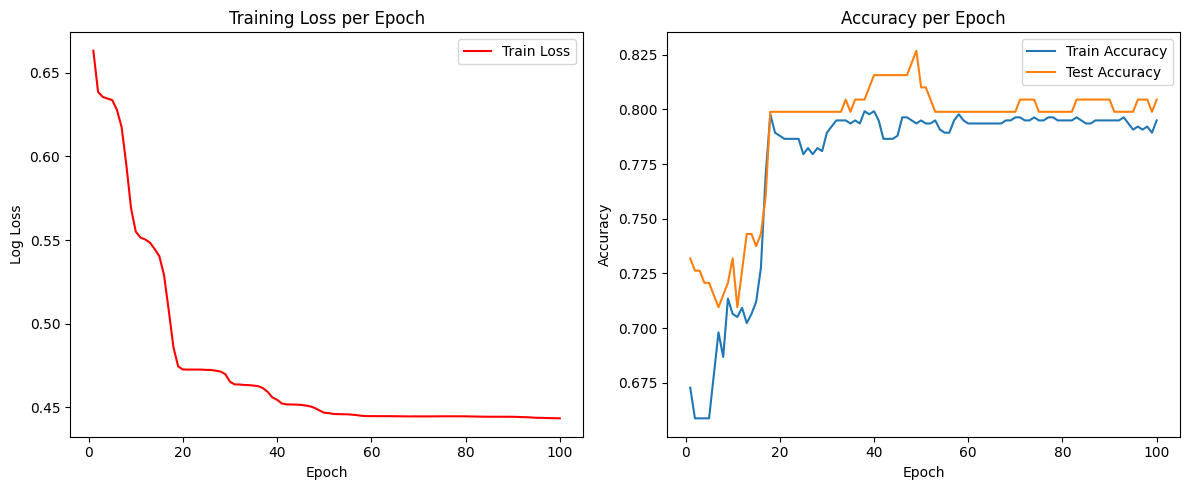

In [ ]:
# Loop to train multiple LogisticRegression models with increasing number of iterations (epochs)
# To see the accuracy and model's performance improves as it gets more time to converge

from sklearn.metrics import log_loss, accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store training loss, training accuracy, and test accuracy at each epoch
max_epochs = 100
train_losses = []
train_accuracies = []
test_accuracies = []

for i in range(1, max_epochs + 1):
    # Create a fresh LogisticRegression with max_iter=i
    temp_clf = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(max_iter=i, solver='lbfgs'))
    ])
    temp_clf.fit(x_train, y_train)

    # Predict probabilities to compute log loss on train set
    y_train_proba = temp_clf.predict_proba(x_train)
    train_loss = log_loss(y_train, y_train_proba)
    train_losses.append(train_loss)

    # Accuracy on train and test sets
    y_train_pred = temp_clf.predict(x_train)
    y_test_pred = temp_clf.predict(x_test)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

    print(f"Epoch {i}/{max_epochs} - Train Loss: {train_loss:.4f} - Train Acc: {train_accuracies[-1]:.4f} - Test Acc: {test_accuracies[-1]:.4f}")

# Plot
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(range(1, max_epochs+1), train_losses, label='Train Loss', color='red')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Training Loss per Epoch')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1, max_epochs+1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, max_epochs+1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy per Epoch')
plt.legend()

plt.tight_layout()
plt.show()

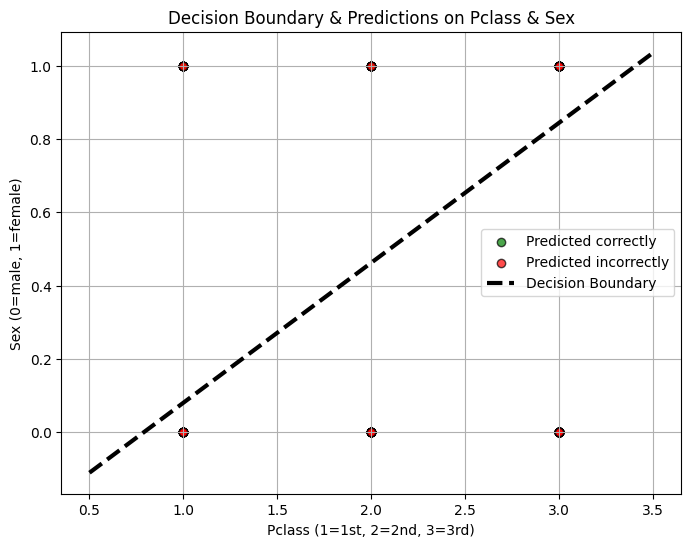

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

#Encode Sex as 0/1 for visualization on test set
sex_map = {'male': 0, 'female': 1}
X_vis = x_test[['Pclass', 'Sex']].copy()
X_vis['Sex'] = X_vis['Sex'].map(sex_map)

#Convert to numpy array for plotting
X_vis_np = X_vis.to_numpy()

#Predict on test set and get correctness mask
y_test_pred = clf.predict(x_test)
correct_mask = (y_test_pred == y_test.values)

#Prepare train set with same features and encoding
X_train_vis = x_train[['Pclass', 'Sex']].copy()
X_train_vis['Sex'] = X_train_vis['Sex'].map(sex_map)

#Train logistic regression on just these 2 features
vis_clf = LogisticRegression()
vis_clf.fit(X_train_vis, y_train)

#Compute decision boundary line
coef = vis_clf.coef_[0]
intercept = vis_clf.intercept_[0]

#Create x-axis values for Pclass
x1_vals = np.linspace(0.5, 3.5, 300)

#Decision boundary: x2 = -(b + w1*x1) / w2
x2_vals = -(intercept + coef[0] * x1_vals) / coef[1]

#Plotting
plt.figure(figsize=(8,6))

#Plot correct predictions in green
plt.scatter(X_vis_np[correct_mask, 0], X_vis_np[correct_mask, 1],
            c='g', edgecolors='black', label='Predicted correctly', alpha=0.7)

#Plot incorrect predictions in red
plt.scatter(X_vis_np[~correct_mask, 0], X_vis_np[~correct_mask, 1],
            c='r', edgecolors='black', label='Predicted incorrectly', alpha=0.7)

#Plot decision boundary
plt.plot(x1_vals, x2_vals, 'k--', linewidth=3, label='Decision Boundary')

plt.xlabel('Pclass (1=1st, 2=2nd, 3=3rd)')
plt.ylabel('Sex (0=male, 1=female)')
plt.title('Decision Boundary & Predictions on Pclass & Sex')
plt.legend()
plt.grid(True)
plt.show()
